# Problem Description

This notebook will guide you through implementation of **multivariate linear regression** to to solve the **polynomial regression** problem:

$$
h_{\theta}(x) = \theta_0 + \theta_1 x + \theta_2 x^2 +  \theta_3 x^3 + \theta_4 x^4
= \boldsymbol{\theta}^T \mathbf{x}
$$

$$
\boldsymbol{\theta} = \begin{bmatrix}\theta_0 \\ \theta_1 \\ \theta_2 \\ \theta_3 \\ \theta_4\end{bmatrix}, 
\qquad
\mathbf{x} = \begin{bmatrix}1 \\ x \\ x^2 \\ x^3 \\ x^4\end{bmatrix}
$$

Below, you will follow steps to 

1. Implement the cost function for multivarate linear regression
1. Compare vectorized code with for-loops
1. Implement the normal equations method to solve a multivariate linear regression problem
1. Implement gradient descent for multivariate linear regression
1. Experiment with feature normalization to improve the convergence of gradient descent


## Imports
Run this code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

## Helper functions
Run this code to set up the helper functions. The function ``feature_expansion`` accepts an vector of $n$ scalar x values and returns an $n \times 5$ data matrix by applying the feature expansion $x \mapsto [1, x, x^2, x^3, x^4]$ to each scalar $x$ value.

In [27]:
def feature_expansion(x, deg):
    if x.ndim > 1:
        raise ValueError('x should be a 1-dimensional array')
    m = x.shape
    x_powers = [x**k for k in range(0,deg+1)]
    X = np.stack( x_powers, axis=1 )

    return X

def plot_model(X_test, theta):
    '''
    Note: uses globals x, y, x_test, which are assigned below
    when the dataset is created. Don't overwrite these variables.
    '''
    y_test = np.dot(X_test, theta)
    plt.scatter(x, y)
    plt.plot(x_test, y_test,color='r')
    plt.legend(['Test', 'Train'])

## (2 points) List comprehensions

Read about Python list comprehensions. Explain what is happening in the following line of code

```python
x_powers = [x**k for k in range(0,deg+1)]
```

** *Your answer here* **

The above statement is equivalent to
```python
for k in range(0,deg+1):
    x_powers[k] = x**k
```

## Create a data set for polynomial regression

Read and run the code below. This generates data from a fourth-degree polynomial and then uses feature expansion to set up the problem of learning the polynomial as multivariate linear regression

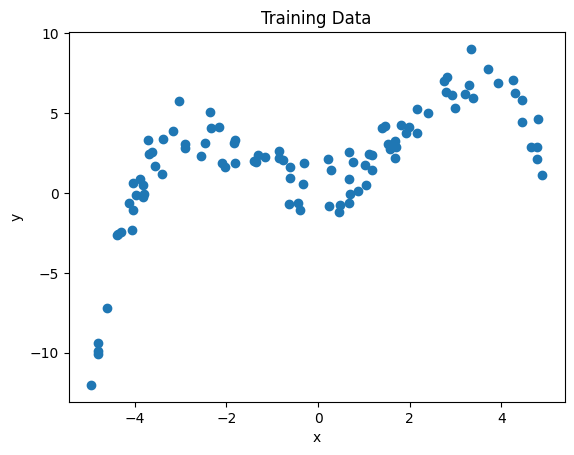

In [3]:
# Set random seed
np.random.seed(0)

# Create random set of m training x values between -5 and 5
m = 100
x = np.random.rand(m)*10 - 5   

# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)
m_test  = len(x_test);

# Feature expansion for training and test x values
deg = 4
X      = feature_expansion(x, deg)
X_test = feature_expansion(x_test, deg)

n = deg + 1   # total number of features including the '1' feature

# Define parameters (theta) and generate y values
theta = 0.1*np.array([1, 1, 10, 0.5, -0.5]);
y = np.dot(X, theta) + np.random.randn(m)   # polynomial plus noise

# Plot the training data
plt.scatter(x, y)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [4]:
#look at the feature expansion for a single training example
print(x[0]) #original data 
print(X[0]) #data with feature expansion

0.48813503927324753
[1.         0.48813504 0.23827582 0.11631078 0.05677536]


## Implement the cost function
Follow the instructions to implement the following cost function for multivariate linear regression:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^n(h_{\theta}(x^{(i)})-y^{(i)})^2$$

### (3 points)  Cost function with loops 
First, implement the cost function using a for-loops: `cost_function_loops`.

In [13]:
def cost_function_loops(X, y, theta):  
    '''
    Compute the cost function for a particular data set and 
    hypothesis (parameter vector)
    
    
    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        theta   parameters (length n vector)
    Output:
        cost    the value of the cost function (scalar)
    '''
    # ToDo: write correct code to implement the cost function given above
    # Use for-loops for this function
    cost = 0
    for i in range(len(y)):
        #cost = cost + 0.5*(np.dot(X[i,:],theta)**2)
        cost = cost + 0.5*((np.dot(X[i,:],theta) - y[i])**2)
        
    return cost

### (3 points)  Vectorized cost function 
Now, implment the same cost function but now WITHOUT any for-loops. You should be using NumPy. This is a "vectorized" version of the cost function: `cost_function_vec`

In [9]:
def cost_function_vec(X, y, theta):  
    '''
    No for-loops allowed! 
    
    Compute the cost function for a particular data set and 
    hypothesis (parameter vector)
    
    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        theta   parameters (length n vector)
    Output:
        cost    the value of the cost function (scalar)
    '''
    
    # TODO: write correct code to implement the cost function given above
    # You CANNOT use for-loops here!
    cost = 0.5*np.sum((X@theta - y)**2)
    return cost

## Test the cost function
Run this to test your cost function.

In [14]:
np.random.seed(1)

theta_random = np.random.rand(n)
theta_zeros  = np.zeros(n)
theta_ones   = np.ones(n)

print("cost_function_loops")
print("=="*10)
print( "Cost (random): %.2f" % cost_function_loops(X, y, theta_random))  # prints 54523.64
print( "Cost (zeros): %.2f" % cost_function_loops(X, y, theta_zeros))   # prints 845.65
print( "Cost (ones): %.2f" % cost_function_loops(X, y, theta_ones))    # prints 2524681.08
print()
print("cost_function_vec")
print("=="*10)
print( "Cost (random): %.2f" % cost_function_vec(X, y, theta_random))  # prints 54523.64
print( "Cost (zeros): %.2f" % cost_function_vec(X, y, theta_zeros))   # prints 845.65
print( "Cost (ones): %.2f" % cost_function_vec(X, y, theta_ones))    # prints 2524681.08
print()
#Note: The for-loop and vectorized cost function implementations should return the EXACT 
# same results. 

cost_function_loops
Cost (random): 54523.64
Cost (zeros): 845.65
Cost (ones): 2524681.08

cost_function_vec
Cost (random): 54523.64
Cost (zeros): 845.65
Cost (ones): 2524681.08



## (2 points)  Time cost functions 

- Run `cost_function_loops` and `cost_function_vec` each 100 times for `theta_random` and the `X` and `y` given above
- Print out the mean and standard deviation across all runs for each function 
- Report which function is faster.  

In [20]:
np.random.seed(1)
theta_random = np.random.rand(n)
##################
# TODO: implement your code here #
##################
import timeit

In [21]:
# cost_function_loops
output_loops = np.zeros(100)
starttime = timeit.default_timer()
for i in range(100):
    np.random.seed(i)
    theta_random = np.random.rand(n)
    output_loops[i] = cost_function_loops(X,y,theta_random)
    
print('Done!, timetaken by cost_function_loops = ', timeit.default_timer() - starttime)    
print('mean using cost_function_loops',output_loops.mean())
print('standard deviation using cost_function_loops',np.sqrt(output_loops.var()))  

Done!, timetaken by cost_function_loops =  0.03266360005363822
mean using cost_function_loops 776895.8593223528
standard deviation using cost_function_loops 678260.0854540418


In [22]:
# cost_function_vec
output_vec = np.zeros(100)
starttime = timeit.default_timer()

for i in range(100):
    np.random.seed(i)
    theta_random = np.random.rand(n)
    output_vec[i] = cost_function_vec(X,y,theta_random)

print('Done!, timetaken by cost_function_vec = ', timeit.default_timer() - starttime)        
print('mean using cost_function_vec',output_vec.mean())
print('standard deviation using cost_function_vec',np.sqrt(output_vec.var()))  

Done!, timetaken by cost_function_vec =  0.0025541000068187714
mean using cost_function_vec 776895.8593223528
standard deviation using cost_function_vec 678260.0854540418


** *Write answer here: report which function is faster* **

`cost_function_vec` took only 0.002554 secs to execute 100 cost functions.<br>
Whereas, `cost_function_loops` took 0.0326636 secs to execute 100 cost function.

### For the rest of this notebook, we will use the vectorized implementation of the cost function 
Run the code below. 

In [23]:
cost_function = cost_function_vec

In [24]:
#make sure it works 
cost_function(X, y, theta_random)

1658942.0944815346

## (7 points) Implement first training algorithm: normal equations
Implement a *vectorized* version of the normal equations! If you use for-loops you will not get full credit. 

In [25]:
def normal_equations(X, y):
    '''
    Train a linear regression model using the normal equations

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
    Output:
        theta   parameters (length n vector)

    '''
    # TODO: write correct code to find theta using the normal equations
    m, n = X.shape
    theta = np.linalg.pinv(X)@y   
    return theta

## Use normal equations to fit the model
Run this code to test your implementation of the normal equations. If it runs properly you will see a curve that fits the data well. Note the value of the cost function for ``theta_normal_equations``.

Cost function: 48.54


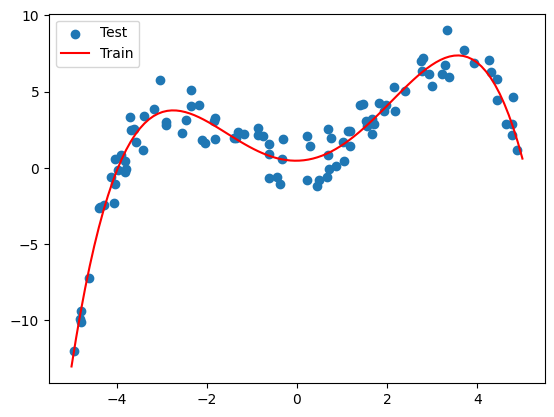

In [28]:
theta_normal_equations = normal_equations(X, y)
plot_model(X_test, theta_normal_equations)
print ("Cost function: %.2f" % cost_function(X, y, theta_normal_equations))

## (7 points) Implement second training algorithm: (vectorized) gradient descent

Implement gradient descent for multivariate linear regression. Make sure your solution is vectorized. If you use for-loops to compute the gradient you will not receive full credit. 

In [109]:
def gradient_descent( X, y, alpha, iters, theta=None ):
    '''
    Train a linear regression model by gradient descent

    Inputs: 
        X       m x n data matrix
        y       training output (length m vector)
        alpha   step size
        iters   number of iterations
        theta   initial parameter values (length n vector; optional)
    
    Output:
        theta      learned parameters (length n vector)
        J_history  trace of cost function value in each iteration

    '''

    m,n = X.shape
    
    if theta is None:
        theta = np.zeros(n)
 
    # For recording cost function value during gradient descent
    J_history = np.zeros(iters)

    for i in range(0, iters):
        
        # TODO: compute gradient (vectorized) and update theta
        grad = (X.T@X@theta) - (X.T@y)

        theta = theta - alpha * (grad)
        # Record cost function
        J_history[i] = cost_function(X, y, theta)
        
    return theta, J_history

## (6 points) Use gradient descent to train the model
* Write code to call your ``gradient_descent`` method to learn parameter
* Plot the model fit (use ``plot_model``)
* Plot the cost function vs. iteration to help assess convergence
* Print the final value of the cost function
* Experiment with different step sizes and numbers of iterations until you can find a good hypothesis. Try to match the cost function value from ``normal_equations`` to two decimal places. How many iterations does this take?

[ 0.2499856   0.1014231   0.99841642  0.04677133 -0.05035558]
Cost function: 50.41


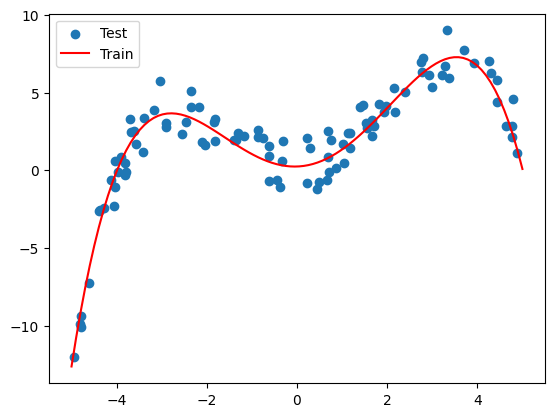

In [134]:
# TODO: write code
theta_gradient_descent, J_hist = gradient_descent(X, y,1e-9, 10000, np.array([0.25, 0.1, 1, 0.02, -0.02]))
print(theta_gradient_descent)
plot_model(X_test, theta_gradient_descent)
print ("Cost function: %.2f" % cost_function(X, y, theta_gradient_descent))

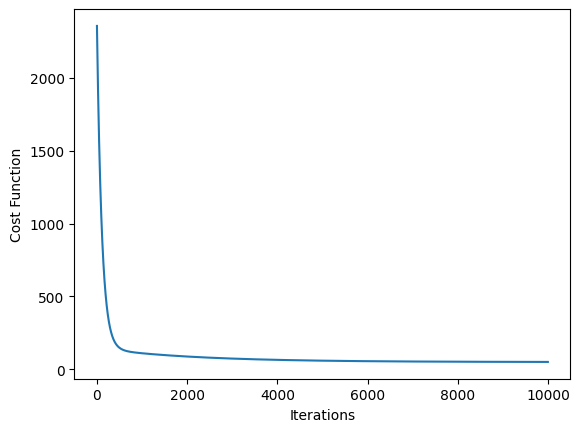

In [138]:
fig,ax = plt.subplots(1,1)
ax.plot(J_hist)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function')
plt.show()

** *Write your answers here* **

## (10 points) Gradient descent with feature normalization
You should have observed
that it takes many iterations of gradient descent to match the cost
function value achieved by the normal equations. Now
you will implement feature normalization to improve the convergence
of gradient descent. Remember that the formula
for feature normalization is:

$$x^{(i)}_j \leftarrow \frac{x^{(i)}_j - \mu_j}{\sigma_j}$$

Here are some guidelines for the implementation:

* The same transformation should be applied to train and test data.

* The values $\mu_j$ and $\sigma_j$ are the mean and standard deviation of
the $j$th column (i.e., feature) in the **training data**. (Hint:
there are numpy functions to compute these.)

* Do not normalize the column of all ones. (Optional question: why?)

* Use broadcasting to do the normalization--don't write for loops

After normalizing both the training data and test data, follow the same steps as above to experiment with gradient descent using the *normalized* training and test data: print the value of the cost function, and create the same plots. Tune the step size and number of iterations again to make gradient descent converge as quickly as possible. How many iterations does it take to match the cost function value from ``normal_equations`` to two decimal places?  


[ 0.15789069  0.02789751  0.89859814  0.05052189 -0.04009414]
Cost function: 114.59


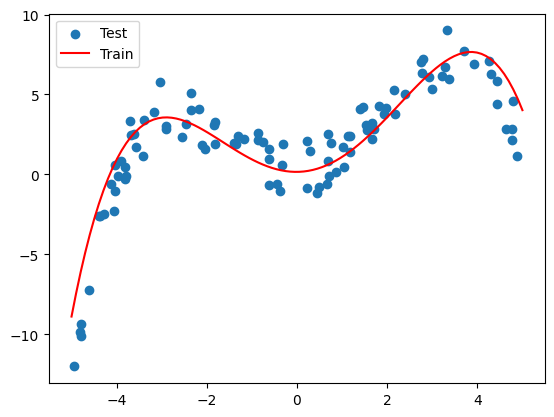

In [159]:
# TODO: your code for gradient descent with feature normalization
X_mean = np.mean(X,axis=0)
X_stddeviation = np.var(X,axis=0)
X_normalized = np.ones(X.shape)
X_normalized[:,1:] = (X[:,1:]-X_mean[1:])/X_stddeviation[1:]


theta_gradient_descent_norm, J_hist_norm  = gradient_descent(X_normalized, y,1e-9, 100000, np.array([0.14, 0.02, 0.9, 0.05, -0.04]))
print(theta_gradient_descent_norm)
plot_model(X_test, theta_gradient_descent_norm)
print ("Cost function: %.2f" % cost_function(X, y, theta_gradient_descent_norm))

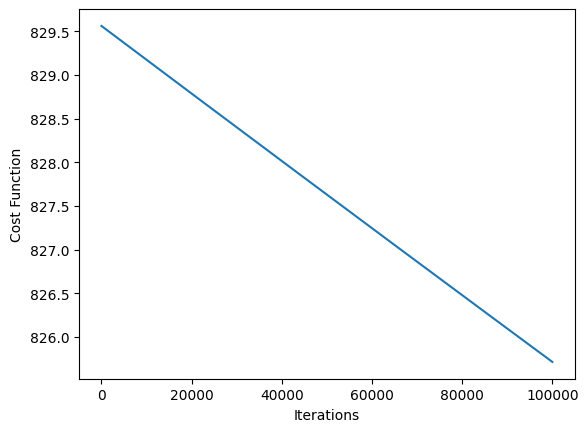

In [160]:
fig,ax = plt.subplots(1,1)
ax.plot(J_hist_norm)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Function')
plt.show()